In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
df = pd.read_csv("/content/day.csv")

In [ ]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [ ]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
unique,NaN,730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,01-01-2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,365.500000,NaN,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,NaN,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,NaN,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000


# Visualization of data

In [ ]:
bike_data = df.copy()
bike_data['dteday'] = pd.to_datetime(bike_data['dteday'], format='%d-%m-%Y')

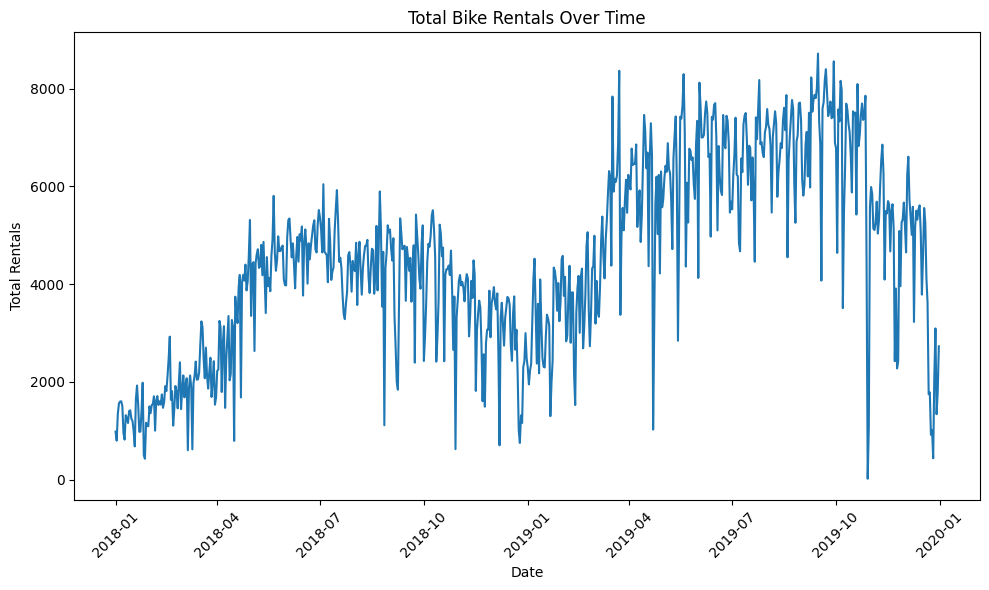

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 4: Plot Total Bike Rentals Over Time
plt.figure(figsize=(10, 6))
sns.lineplot(x='dteday', y='cnt', data=bike_data)
plt.title('Total Bike Rentals Over Time')
plt.xlabel('Date')
plt.ylabel('Total Rentals')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

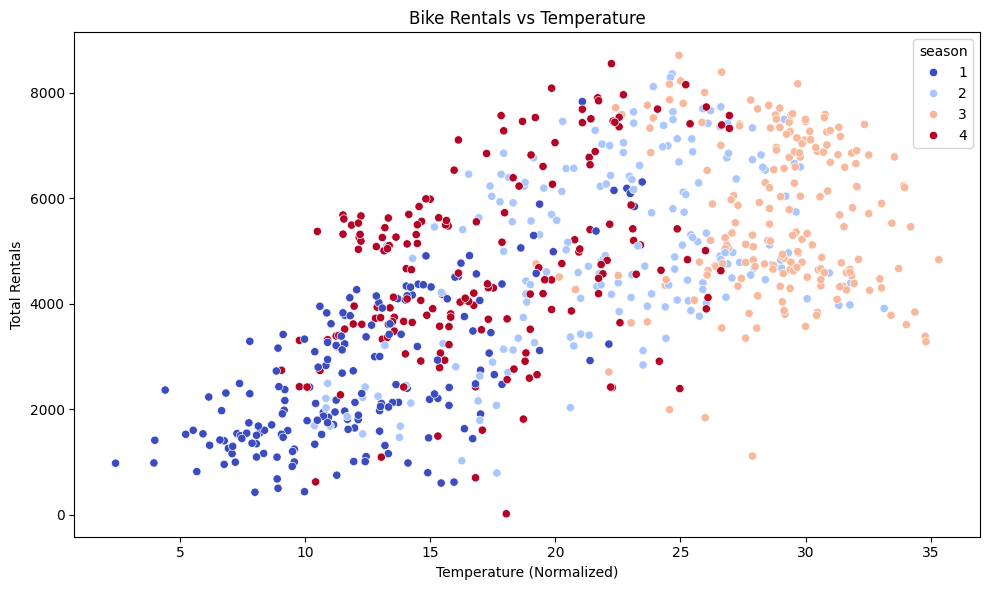

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=bike_data, hue='season', palette='coolwarm')
plt.title('Bike Rentals vs Temperature')
plt.xlabel('Temperature (Normalized)')
plt.ylabel('Total Rentals')
plt.tight_layout()
plt.show()

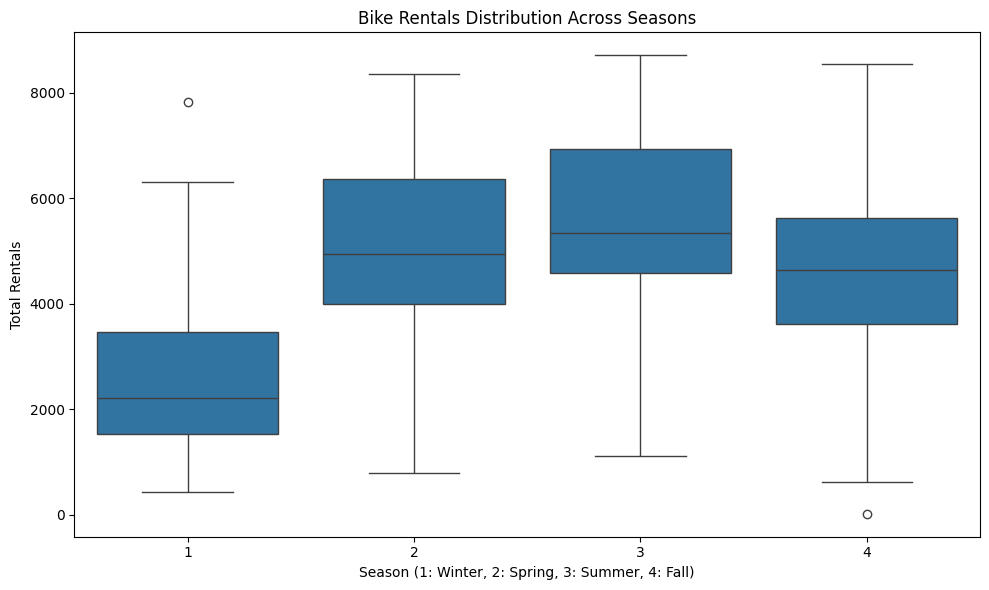

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', data=bike_data)
plt.title('Bike Rentals Distribution Across Seasons')
plt.xlabel('Season (1: Winter, 2: Spring, 3: Summer, 4: Fall)')
plt.ylabel('Total Rentals')
plt.tight_layout()
plt.show()

# preparing the data

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('day.csv')
data_copy = data.copy()

numeric_cols = data_copy.select_dtypes(include='number').columns
data_copy[numeric_cols] = data_copy[numeric_cols].fillna(data_copy[numeric_cols].median(), inplace=False)

data_copy.drop(columns=['instant', 'casual', 'registered'], inplace=True, axis=1)


columns_to_scale = data_copy.select_dtypes(include='number').columns.tolist()


scaler = StandardScaler()
data_copy[columns_to_scale] = scaler.fit_transform(data_copy[columns_to_scale])

data_copy.head()


,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,-1.350819,-1.0,-1.602745,-0.172102,1.497785,-1.469753,1.112127,-0.827613,-0.680818,1.252343,-0.387833,-1.820972
1,02-01-2018,-1.350819,-1.0,-1.602745,-0.172102,-1.495052,-1.469753,1.112127,-0.722069,-0.741507,0.480996,0.748899,-1.916078
2,03-01-2018,-1.350819,-1.0,-1.602745,-0.172102,-0.996246,0.680387,-0.724644,-1.635432,-1.750344,-1.338073,0.745931,-1.632827
3,04-01-2018,-1.350819,-1.0,-1.602745,-0.172102,-0.497440,0.680387,-0.724644,-1.615560,-1.610886,-0.261577,-0.389769,-1.522732
4,05-01-2018,-1.350819,-1.0,-1.602745,-0.172102,0.001367,0.680387,-0.724644,-1.468226,-1.505615,-1.340294,-0.046477,-1.503090


# trying different models

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X=data_copy[['season','yr','mnth','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed']]
y=data_copy['cnt']
# Assuming you have X and y defined as your features and target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)
print('RandomForestRegressor mse:\n', mean_squared_error(y_test,y_pred))

RandomForestRegressor mse:
 0.08135197947925216


In [ ]:
from sklearn.tree import DecisionTreeRegressor
model_rf = DecisionTreeRegressor()
model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)
print('DecisionTreeRegressor mse:\n', mean_squared_error(y_test,y_pred))



DecisionTreeRegressor mse:
 0.15018308695506777


In [ ]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
print('Linear Regression MSE:', mse_lr)


Linear Regression MSE: 0.15039060068436078


In [ ]:

from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_mlp = MLPRegressor(random_state=42, max_iter=1000, solver='adam', learning_rate_init=0.001)
model_mlp.fit(X_train_scaled, y_train)

y_pred_mlp = model_mlp.predict(X_test_scaled)

mse_mlp = mean_squared_error(y_test, y_pred_mlp)
print('MLP Regressor MSE:', mse_mlp)


MLP Regressor MSE: 0.08404533245735868


In [ ]:
from sklearn.svm import SVR

model_svr = SVR()
model_svr.fit(X_train, y_train)

y_pred_svr = model_svr.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
print('Support Vector Regressor MSE:', mse_svr)


Support Vector Regressor MSE: 0.07635455127629565


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

model_gb = GradientBoostingRegressor(random_state=42)
model_gb.fit(X_train, y_train)

y_pred_gb = model_gb.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
print('Gradient Boosting Regressor MSE:', mse_gb)


Gradient Boosting Regressor MSE: 0.08877579943038785


In [ ]:
from xgboost import XGBRegressor

model_xgb = XGBRegressor(random_state=42)
model_xgb.fit(X_train, y_train)

y_pred_xgb = model_xgb.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print('XGBoost Regressor MSE:', mse_xgb)


XGBoost Regressor MSE: 0.08574417666852024


### Best  Models Based on Accuracy:

### Support Vector Regressor MSE: 0.07635455127629565

In [ ]:
import joblib

best_model = model_svr
joblib.dump(best_model, 'model.pkr')

['model.pkr']